<a href="https://colab.research.google.com/github/liuy01510/portfolio/blob/master/Python/ML/SVM/SVM_Classifier_(Diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [151]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import collections as coll

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,accuracy_score

# Importing data

In [152]:
try:
    data
except:
    data=fetch_openml(data_id=37)

data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [153]:
X=data['data']
y=data['target']

print(f"Number of instances = {len(X)}")
print(f"Number of features per instance = {X.shape[1]}")

Number of instances = 768
Number of features per instance = 8


# SVC Model

## Data Visualization

In [154]:
X_frame=pd.DataFrame(X,columns=data['feature_names'])
X_frame

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [155]:
#Converting the target array to binary vector#
y_types=sorted(list(set(data['target'])))
y_conv=dict(list(zip(y_types,[0,1]))) # conversion dict
y_conv_func=np.vectorize(y_conv.get) # create a vectorized function for the dict mapping
y=y_conv_func(data['target']) # performing mapping to create binary vector

for i in range(len(y)): # error checking on the conversion function
    if y_conv[data['target'][i]]!=y[i]:
        print(f"There is a conversion error on the {i}th value.")

#Splitting of the training and test sets#
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1) # 20% reserved for test set

#Performing standard scaling on the feature vector#
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)


## Model Training

In [156]:
#Model creation#
svc=SVC(C=1.0,kernel='poly',degree=3,gamma='scale',coef0=0.0) # initial values

#Training the default model#
y_predict=cross_val_predict(svc,X_train,y_train,cv=5)

#Obtaining the confusion matrix#
print(f"The confusion matrix for this default SVC model is:")
cf_frame=pd.DataFrame(confusion_matrix(y_train,y_predict),index=[0,1],columns=[0,1])
print(cf_frame)

#Getting the precision, recall and F1 scores#
def Get_Classifier_Scores(y_true,y_predict):
    print(f"The accuracy score for this model is {accuracy_score(y_true,y_predict)*100:.2f}%")
    print(f"The precision score for this model is {precision_score(y_true,y_predict)*100:.2f}%.")
    print(f"The recall score for this model is {recall_score(y_true,y_predict)*100:.2f}%.")
    print(f"The F1 score for this model is {f1_score(y_true,y_predict)*100:.2f}%.")

Get_Classifier_Scores(y_train,y_predict)

The confusion matrix for this default SVC model is:
     0   1
0  374  27
1  139  74
The accuracy score for this model is 72.96%
The precision score for this model is 73.27%.
The recall score for this model is 34.74%.
The F1 score for this model is 47.13%.


# Improving SVC Model performance

## Performing Grid Search

In [157]:
#Parameter search grid#
param_grid={'C':[0.01,0.1,1,10,100],\
            'degree':[1,10,100,500,700],\
            'coef0':[0,0.1,1,10,100]}

#Creating the GridSearchCV object#
gscv=GridSearchCV(SVC(),param_grid,scoring='f1',cv=5,n_jobs=-1)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 0.1, 1, 10, 100],
                         'degree': [1, 10, 100, 500, 700]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [158]:
#Getting the result#
print(f"Best score = {gscv.best_score_}")
print(f"Best params = {gscv.best_params_}")

#Attempting using the rbf kernel#
param_grid={'kernel':['rbf'],\
            'coef0':[0.001,0.01,0.1,1,10,100,1000],\
            'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

gscv=GridSearchCV(SVC(),param_grid,scoring='f1',cv=5,n_jobs=-1)
gscv.fit(X_train,y_train)
print(f"Best score = {gscv.best_score_}")
print(f"Best params = {gscv.best_params_}")

Best score = 0.5792239591229642
Best params = {'C': 1, 'coef0': 0, 'degree': 1}
Best score = 0.5792239591229642
Best params = {'C': 1, 'coef0': 0.001, 'kernel': 'rbf'}


In [159]:
#Analyzing the results of the grid search#
cv_results_frame=pd.DataFrame(gscv.cv_results_['params'])
cv_results_frame=cv_results_frame.drop(columns=['kernel']) # drop the 'kernel' column
cv_results_frame['f1_score']=gscv.cv_results_['mean_test_score'] # adding the f1 score col

#Plotting the heatmap#
def Plot(figsize=(10,10),dpi=200):
    fig=plt.Figure(figsize=figsize,dpi=dpi)
    ax=fig.add_subplot(111)
    return ax,fig

#Creating the 2d array plot#
cv_results_frame=cv_results_frame.sort_values(by=['C','coef0'],axis=0,ascending=True)
columns_labels=sorted(list(set(cv_results_frame['coef0'])))
index_labels=sorted(list(set(cv_results_frame['C'])))
frame_2d=pd.DataFrame(data=cv_results_frame['f1_score'].to_numpy().reshape((len(index_labels),len(columns_labels))),\
                      index=index_labels,\
                      columns=columns_labels)
frame_2d.rename_axis('C',axis='index',inplace=True)
frame_2d.rename_axis('coef0',axis='columns',inplace=True)
frame_2d

coef0,0.001,0.010,0.100,1.000,10.000,100.000,1000.000
C,,,,,,,
0.0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1000,0.349355,0.349355,0.349355,0.349355,0.349355,0.349355,0.349355
1.0000,0.579224,0.579224,0.579224,0.579224,0.579224,0.579224,0.579224
10.0000,0.574164,0.574164,0.574164,0.574164,0.574164,0.574164,0.574164
100.0000,0.524363,0.524363,0.524363,0.524363,0.524363,0.524363,0.524363
1000.0000,0.514778,0.514778,0.514778,0.514778,0.514778,0.514778,0.514778


- It can be seen that the variation of the coef0 hyperparameter does not seem to have an effect on the f1 score.
- However, the C hyperparameter seems to indicate that the optimal value lies between the range of 0.1 to 10.
    - Therefore, the next tuning step should focus on searching for the optimal C parameter within this range.

## Stratified splitting of the data sets
- Before the 2nd round of hyperparameter searching, another possible attempt to increase the validity of the model is to perform stratified shuffling of the cv model during scoring.

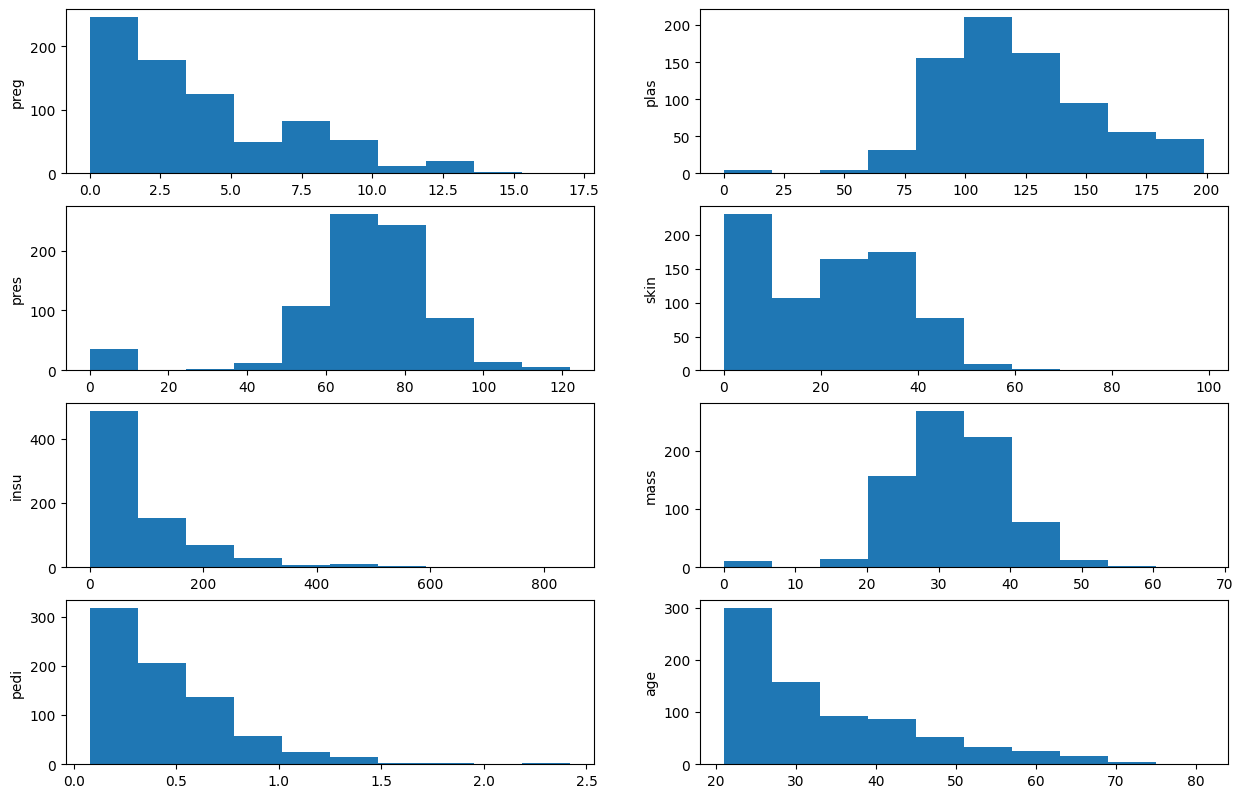

In [160]:
# Visualizing the dataset
fig=plt.Figure(figsize=(15,10),dpi=100)
axes=fig.subplots(nrows=4,ncols=2) # 4x2 grid for histogram
axes=axes.ravel()
for i,ax in enumerate(axes):
    ax.hist(X_frame.iloc[:,i])
    ax.set_ylabel(X_frame.columns[i])
fig

In [161]:
#Checking which feature should be chosen for stratification#
for feature in X_frame.columns:
    
    feat_cat=pd.cut(X_frame[feature],bins=np.linspace(-1,max(X_frame[feature]),7),labels=[i for i in range(6)]) # 10 bins
    X=X_frame.copy() # make a copy of the original dataframe
    splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=1)
    try:
        for train_index,test_index in splitter.split(X,feat_cat): # returns a generator object containing the splitted indexes
            X_train_strat=X.loc[train_index,:].to_numpy()
            y_train_strat=y[train_index]
            X_test_strat=X.loc[test_index,:].to_numpy()
            y_test_strat=y[test_index]
    except: # accounting for features with 1 member possibilities after stratification.
        continue
        
    
    standard_scaler=StandardScaler()
    X_train_strat=standard_scaler.fit_transform(X_train_strat) # scaling of the training set
    X_test_strat=standard_scaler.transform(X_test_strat) # scaling of the test set

    svc=SVC(C=1.0,kernel='poly',degree=3,gamma='scale',coef0=0.0) # compare against the original SVC
    y_predict_strat=cross_val_predict(svc,X_train_strat,y_train_strat,cv=5)
    f1_scored=f1_score(y_train_strat,y_predict_strat)
    print(f"The F1 score for the stratified feature {feature} is {f1_scored*100:.2f}%.")

The F1 score for the stratified feature preg is 50.79%.
The F1 score for the stratified feature plas is 50.77%.
The F1 score for the stratified feature pres is 51.22%.
The F1 score for the stratified feature insu is 54.01%.
The F1 score for the stratified feature mass is 51.71%.
The F1 score for the stratified feature pedi is 53.22%.
The F1 score for the stratified feature age is 55.88%.


- Therefore, it can be seen from the above test that the f1 score for all the stratified datasets appears to be higher than the original unstratified data.
    - This indicates that stratified sampling is useful in this situation.
- Also, the stratification based on the feature "age" seems to produce the highest f1 score.
    - Therefore, the model should be retrained on a stratified dataset based on the "age" feature.

## Implementing the improvements

In [162]:
#Stratification of the datasets#
strat_feature='age'
bins=7
feat_cat=pd.cut(X_frame[strat_feature],np.linspace(-1,max(X_frame[strat_feature]),bins),labels=[i for i in range(bins-1)]) # cut into 8 bins
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2) # stratified splitter object

for train_index,test_index in splitter.split(X,feat_cat): # perform stratification
    X_train=X.to_numpy()[train_index,:]
    y_train=y[train_index]
    X_test=X.to_numpy()[test_index,:]
    y_test=y[test_index]

standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

#2nd round of grid search#
param_grid={'kernel':['rbf','poly'],\
            'C':[i for i in np.arange(0.1,10.1,0.1)]}

gscv=GridSearchCV(SVC(),param_grid,scoring='f1',cv=5,n_jobs=-1)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0....
                               1.2000000000000002, 1.3000000000000003,
                               1.4000000000000001, 1.5000000000000002, 1.6,
                               1.7000000000000002, 1.8000000000000003,
                               1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004,
                               2.5000000000000004, 2.6, 2.7, 2.8000000000000003,
           

In [163]:
#Getting the optimal parameters#
print("The best parameters for the model is:")
print(f"{gscv.best_params_}")


svc=gscv.best_estimator_ # returns the optimal model

#Testing the performance of the optimized model#
y_predict=cross_val_predict(svc,X_train,y_train,cv=5)

Get_Classifier_Scores(y_train,y_predict)

The best parameters for the model is:
{'C': 0.9, 'kernel': 'rbf'}
The accuracy score for this model is 76.71%
The precision score for this model is 72.51%.
The recall score for this model is 56.36%.
The F1 score for this model is 63.43%.


- It can be seen that the optimized f1 score is around 60%, which is approximately 10~20% higher than the unoptimized model.
- However, this score is still too low for the model to be used.
    - Other ML models may be explored for this problem.